In [2]:
#  import all liabraries
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
import pickle



import warnings 
warnings.filterwarnings('ignore')

In [3]:
data = pd.read_csv("https://raw.githubusercontent.com/dsrscientist/dataset1/master/abalone.csv")
data

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,7
...,...,...,...,...,...,...,...,...,...
4172,F,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11
4173,M,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10
4174,M,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9
4175,F,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,10


In [5]:
data.shape

(4177, 9)

In [6]:
data.head()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


In [7]:
data.describe()

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
count,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000
mean,0.523992,0.407881,0.139516,0.828742,0.359367,0.180594,0.238831,9.933684
std,0.120093,0.099240,0.041827,0.490389,0.221963,0.109614,0.139203,3.224169
min,0.075000,0.055000,0.000000,0.002000,0.001000,0.000500,0.001500,1.000000
25%,0.450000,0.350000,0.115000,0.441500,0.186000,0.093500,0.130000,8.000000
50%,0.545000,0.425000,0.140000,0.799500,0.336000,0.171000,0.234000,9.000000
75%,0.615000,0.480000,0.165000,1.153000,0.502000,0.253000,0.329000,11.000000
max,0.815000,0.650000,1.130000,2.825500,1.488000,0.760000,1.005000,29.000000


In [8]:
# droping unwanted column
data = data.drop(columns = ['Sex'])
data.head()

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


In [9]:
# using apply function to create new column for age =( rings+1.5)
data['Age'] = data.apply(lambda row: (row.Rings + 1.5),axis = 1)
data

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings,Age
0,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,15,16.5
1,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,7,8.5
2,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,9,10.5
3,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,10,11.5
4,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,7,8.5
...,...,...,...,...,...,...,...,...,...
4172,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11,12.5
4173,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10,11.5
4174,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9,10.5
4175,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,10,11.5


In [10]:
data.head()

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings,Age
0,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15,16.5
1,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7,8.5
2,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9,10.5
3,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10,11.5
4,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7,8.5


In [11]:
data=data.drop(columns=['Rings'])
data.head()

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Age
0,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,16.5
1,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,8.5
2,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,10.5
3,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,11.5
4,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,8.5


In [ ]:
# lets see how data is distributed in every coulmn

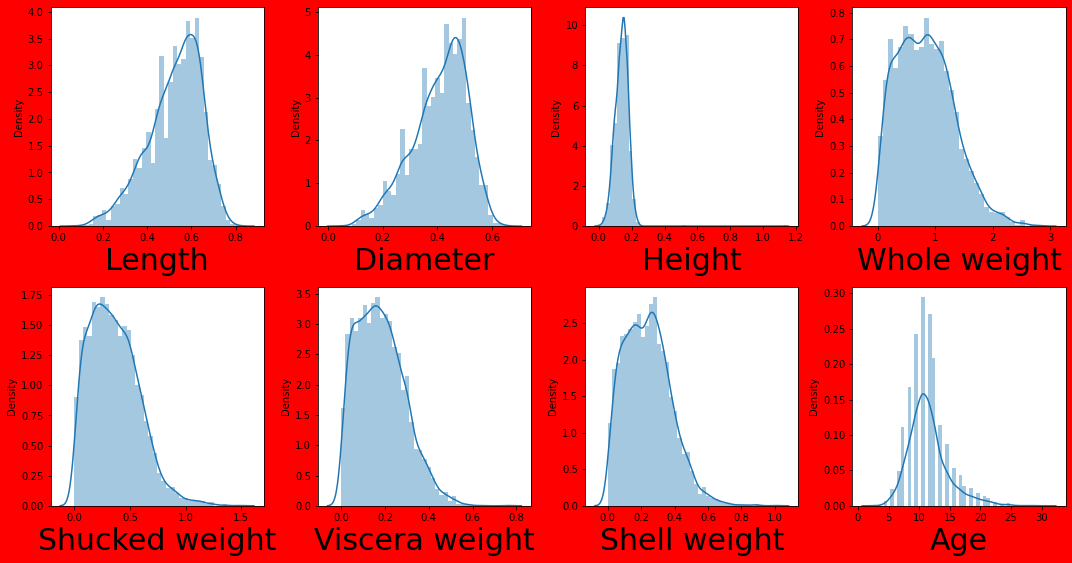

In [12]:
plt.figure(figsize=(15,15), facecolor='red')
plotnumber = 1

for column in data:
    if plotnumber<=8:
        ax = plt.subplot(4,4,plotnumber)
        sns.distplot(data[column])
        plt.xlabel(column,fontsize=30)
        
    plotnumber+=1
plt.tight_layout()

In [13]:
# relationship b/w independent and dependent variable
# divide data set into features and label
y = data['Age']
X = data.drop(columns = ['Age'])

In [14]:
y

0       16.5
1        8.5
2       10.5
3       11.5
4        8.5
        ... 
4172    12.5
4173    11.5
4174    10.5
4175    11.5
4176    13.5
Name: Age, Length: 4177, dtype: float64

In [15]:
X

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight
0,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500
1,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700
2,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100
3,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550
4,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550
...,...,...,...,...,...,...,...
4172,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490
4173,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605
4174,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080
4175,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960


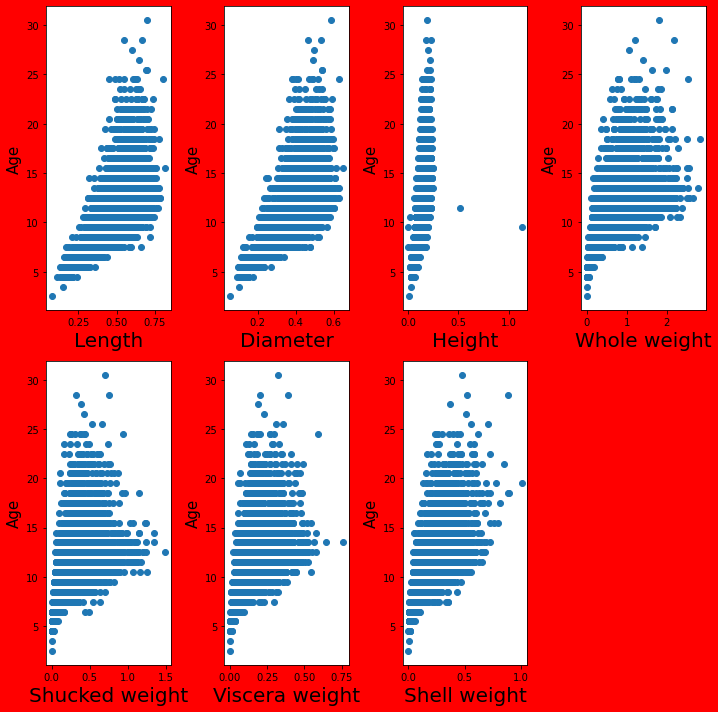

In [16]:
plt.figure(figsize=(10,10), facecolor='red')
plotnumber = 1

for column in X:
    if plotnumber<=8:
        ax = plt.subplot(2,4,plotnumber)
        plt.scatter(X[column],y)
        plt.xlabel(column,fontsize=20)
        plt.ylabel('Age',fontsize = 15)
        
    plotnumber+=1
plt.tight_layout()

In [17]:
#data scaling formula z=(x-mean)/std
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [18]:
X_scaled

array([[-0.57455813, -0.43214879, -1.06442415, ..., -0.60768536,
        -0.72621157, -0.63821689],
       [-1.44898585, -1.439929  , -1.18397831, ..., -1.17090984,
        -1.20522124, -1.21298732],
       [ 0.05003309,  0.12213032, -0.10799087, ..., -0.4634999 ,
        -0.35668983, -0.20713907],
       ...,
       [ 0.6329849 ,  0.67640943,  1.56576738, ...,  0.74855917,
         0.97541324,  0.49695471],
       [ 0.84118198,  0.77718745,  0.25067161, ...,  0.77334105,
         0.73362741,  0.41073914],
       [ 1.54905203,  1.48263359,  1.32665906, ...,  2.64099341,
         1.78744868,  1.84048058]])

In [19]:
x_train,x_test,y_train,y_test = train_test_split(X_scaled,y,test_size = 0.25,random_state=376)
y_train.head()

1304    10.5
2178    16.5
1209    12.5
2479    15.5
782     11.5
Name: Age, dtype: float64

In [20]:
#model instatning and training
regression = LinearRegression()
regression.fit(x_train, y_train)

LinearRegression()

In [21]:
# predict the age from features
data.tail(2)

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Age
4175,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.296,11.5
4176,0.710,0.555,0.195,1.9485,0.9455,0.3765,0.495,13.5


In [23]:
#we have already fit the scaler,you can transform the data
print('Age : ',regression.predict(scaler.transform([[0.710,0.555,0.195,1.9485,0.9455,0.3765,0.495]])))

Age :  [12.55085769]


# save file for future prediction

In [24]:
# saving the model to the local file system
pickle.dump(regression, open('Aregr_model','wb'))

In [25]:
# predicting using the saved model
loaded_model = pickle.load(open('Aregr_model','rb'))
a=loaded_model.predict(scaler.transform([[0.605,0.455,0.140,1.0777,0.5310,0.2560,0.185]]))

In [26]:
a

array([9.50627148])

In [27]:
# lets try in new window with only pickle model
scaler.transform([[0.605,0.455,0.140,1.0777,0.5310,0.2560,0.185]])

array([[ 0.67462432,  0.47485339,  0.01156329,  0.50773496,  0.77334105,
         0.68800744, -0.38675483]])

In [29]:
#  lets check how well model fits on train data
# adjusted r2 score
regression.score(x_train,y_train)

0.5331983836412485

In [28]:
#  lets check how well model fits on test data
regression.score(x_test,y_test)

0.5092359179022027

#  lets plot and visualize

In [30]:
y_pred = regression.predict(x_test)
y_pred

array([ 5.96669394, 12.02557688, 11.17959713, ..., 10.17676684,
        9.15076579, 11.6548333 ])

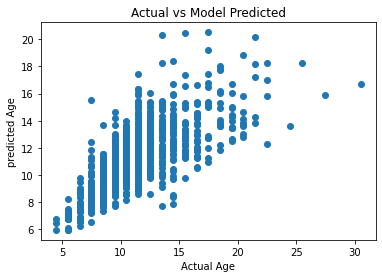

In [31]:
plt.scatter(y_test,y_pred)
plt.xlabel('Actual Age')
plt.ylabel('predicted Age')
plt.title('Actual vs Model Predicted')
plt.show()

In [32]:
from sklearn.metrics import mean_squared_error , mean_absolute_error

In [33]:
y_pred = regression.predict(x_test)

In [34]:
# MAE
mean_absolute_error(y_test,y_pred)

1.6220374694798332

In [35]:
# MSE
mean_squared_error(y_test,y_pred)

5.06769455899188

In [36]:
#RMSE
np.sqrt(mean_squared_error(y_test,y_pred))

2.25115405047986

In [37]:
from sklearn.linear_model import Ridge,Lasso,RidgeCV, LassoCV

# Lasso regularization

In [38]:
lasscv = LassoCV(alphas = None, max_iter = 100, normalize = True)
lasscv.fit(x_train,y_train)

LassoCV(max_iter=100, normalize=True)

In [39]:
#best alpha parameter
alpha = lasscv.alpha_
alpha

3.640288918392835e-05

In [40]:
# now use lasso regression
lasso_reg = Lasso(alpha)
lasso_reg.fit(x_train, y_train)

Lasso(alpha=3.640288918392835e-05)

In [41]:
lasso_reg.score(x_test, y_test)

0.5092311267458913

#  using ridge regression model

In [45]:
# ridgecv will return best alpha and coefficient after performing 10 cross validation
ridgecv = RidgeCV(alphas = np.arange(0.001,0.1,0.01),normalize = True)
ridgecv.fit(x_train, y_train)

RidgeCV(alphas=array([0.001, 0.011, 0.021, 0.031, 0.041, 0.051, 0.061, 0.071, 0.081,
       0.091]),
        normalize=True)

In [47]:
ridgecv.alpha_

0.001

In [48]:
ridge_model = Ridge(alpha=ridgecv.alpha_)
ridge_model.fit(x_train, y_train)

Ridge(alpha=0.001)

In [49]:
ridge_model.score(x_test, y_test)

0.5092355135255098

#  all model give 50% so 50% is right answer